In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Load dataset
train_data = pd.read_csv("hp_reg/train.csv")
test_data = pd.read_csv("hp_reg/test.csv")

In [8]:
# Display basic info
print(train_data.info())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
num_features = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_features = train_data.select_dtypes(include=['object']).columns

In [10]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mode')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [11]:
# Define target variable and features
# Drop 'Id' only if it exists in the dataset
if 'Id' in train_data.columns:
    X = train_data.drop(columns=['SalePrice', 'Id'])
else:
    X = train_data.drop(columns=['SalePrice'])

y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train different models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}\n")


ValueError: A given column is not a column of the dataframe

In [13]:
# Train different models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

best_model = None
best_score = float("-inf")

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")
    
    if r2 > best_score:
        best_score = r2
        best_model = pipeline

NameError: name 'DecisionTreeRegressor' is not defined

In [14]:
train_data['HouseAge'] = 2024 - train_data['YearBuilt']
test_data['HouseAge'] = 2024 - test_data['YearBuilt']


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Definitions
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R² Score: {r2:.4f}")


ValueError: could not convert string to float: 'RL'

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Numerical transformation: Impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformation: Impute missing values and encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [17]:
from sklearn.pipeline import Pipeline

# Train models with preprocessing
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)  # Now categorical variables are handled correctly
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R² Score: {r2:.4f}")


Linear Regression R² Score: 0.8867
Decision Tree R² Score: 0.7788
Random Forest R² Score: 0.8946


In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Perform Grid Search CV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"The Best Parameters for Random Forest: {grid_search.best_params_}")
print(f"The Best R² Score from Cross-Validation: {grid_search.best_score_:.4f}")


ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'RM'

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ML/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'RL'


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns   
cat_features = X.select_dtypes(include=['object']).columns

# Numerical transformation: Impute missing values and scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformation: Impute missing values and encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [16]:
# Identify Categrical Features
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20]
}

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
print(f"Best R² Score from Cross-Validation: {grid_search.best_score_:.2f}")


Best Parameters for Random Forest: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best R² Score from Cross-Validation: 0.84


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


evaluation_results = {}

for name, model in models.items():
  
    y_pred = model.predict(X_test)

 
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

   
    evaluation_results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}


    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

eval_data = pd.DataFrame(evaluation_results).T
print("\nModel Comparison:\n", eval_data)


/opt/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'RL'

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing for categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convert categories to numbers
])

# Combine into a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply preprocessing before training the model
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)  # Ensure transformation is consistent


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R² Score: {r2:.4f}")


NameError: name 'models' is not defined

In [21]:
import joblib

# Saving the best model
best_model = max(evaluation_results, key=lambda x: evaluation_results[x]['R² Score'])
best_model = models[best_model]
joblib.dump(best_model, "best_house_price_model.pkl")

print(f"\nBest Model: {best_model} saved successfully!")


ValueError: max() iterable argument is empty

In [22]:
import joblib

# Save the best model
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['R² Score'])
best_model = models[best_model_name]
joblib.dump(best_model, "best_house_price_model.pkl")

print(f"\nBest Model: {best_model_name} saved successfully!")


ValueError: max() iterable argument is empty

In [23]:
evaluation_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    }

    print(f"{name} Performance:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}\n")


if evaluation_results:
    best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['R² Score'])
    best_model = models[best_model_name]

    # Saving the best model
    import joblib
    joblib.dump(best_model, "best_house_price_model.pkl")

    print(f"Best model '{best_model_name}' saved as 'best_house_price_model.pkl'")
else:
    print("No models were evaluated successfully. Check for errors in training.")


Linear Regression Performance:
MAE: 18288.19, MSE: 868708015.64, RMSE: 29473.85, R² Score: 0.89

Decision Tree Performance:
MAE: 26476.69, MSE: 1697039333.39, RMSE: 41195.14, R² Score: 0.78

Random Forest Performance:
MAE: 17408.14, MSE: 808384987.25, RMSE: 28432.11, R² Score: 0.89

Best model 'Random Forest' saved as 'best_house_price_model.pkl'


In [24]:
# Extract feature importance from the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_data = importance_data.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_data)
    plt.title('Feature Importance')
    plt.show()

    print(importance_data)


ValueError: All arrays must be of the same length

In [32]:
# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()
feature_importance = best_model.named_steps["regressor"].feature_importances_

# Ensure the lengths match
print(len(feature_names), len(feature_importance))

# Create DataFrame for feature importance
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_data = importance_data.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_data)
plt.title('Feature Importance')
plt.show()


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [33]:
# Fit the preprocessor
preprocessor.fit(X_train)

# Get the transformed feature names
feature_names = preprocessor.get_feature_names_out()


ValueError: A given column is not a column of the dataframe

In [36]:
# Ensure the preprocessor is fitted
preprocessor.fit(X_train)

# Get transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Extract feature importance from the best model
feature_importance = best_model.named_steps["regressor"].feature_importances_

# Create a DataFrame
importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_data= importance_data.sort_values(by='Importance', ascending=False)

# Display top features
print(importance_data.head(10))


ValueError: A given column is not a column of the dataframe

In [2]:
if 'Id' in train_data.columns:
    X = train_data.drop(columns=['SalePrice', 'Id'])  
else:
    X = train_data.drop(columns=['SalePrice'])


NameError: name 'train_data' is not defined

In [38]:
print("Train Columns:", X_train.columns)
print("Test Columns:", X_test.columns)

# Find missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)
print("Missing Columns in Test Set:", missing_cols)


Train Columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'P

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [40]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()


ValueError: A given column is not a column of the dataframe

In [41]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
num_features = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_features = train_data.select_dtypes(include=['object']).columns

# Define imputers
num_imputer = SimpleImputer(strategy='median')  # Fill missing numerical values with median
cat_imputer = SimpleImputer(strategy='most_frequent')  # Fill missing categorical values with mode

# Apply imputers
train_data[num_features] = num_imputer.fit_transform(train_data[num_features])
train_data[cat_features] = cat_imputer.fit_transform(train_data[cat_features])


In [42]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = encoder.fit_transform(train_data[cat_features])

# Convert to DataFrame and merge with original dataset
encoded_cat_data = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features))
train_data = train_data.drop(columns=cat_features).reset_index(drop=True)  # Remove old categorical columns
train_data = pd.concat([train_data, encoded_cat_data], axis=1)  # Concatenate with encoded features


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[num_features] = scaler.fit_transform(train_data[num_features])


In [19]:
from sklearn.model_selection import train_test_split

# Define target variable (SalePrice) and features
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Get feature importance from the best model (assuming it's a tree-based model)
best_model = models["Random Forest"]  # Change this if another model performed better
feature_importance = best_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
importance_data= pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_data = importance_data.sort_values(by="Importance", ascending=False)

# Display the most important features
print(importance_data.head(10))


ValueError: All arrays must be of the same length

In [21]:
1. Data Generation, Not Prediction, Is the Goal of Generative Models
The main application of GANs and VAEs is the creation of new samples, such as text, photos, or artificial data points.
On the other hand, our challenge is a regression task that involves estimating a continuous numerical value (home price) based on provided variables.
Regression is an example of structured predictive modeling in which generative models do not naturally perform well.


SyntaxError: invalid syntax (496514195.py, line 1)


1. Data Generation, Not Prediction, Is the Goal of Generative Models
The main application of GANs and VAEs is the creation of new samples, such as text, photos, or artificial data points.
On the other hand, our challenge is a regression task that involves estimating a continuous numerical value (home price) based on provided variables.
Regression is an example of structured predictive modeling in which generative models do not naturally perform well.

2. Insufficient Interpretability and Analysis of Feature Contribution
 We can evaluate the relative value of various factors (e.g., how lot size, number of rooms, or year built influences pricing) using regression models such as Linear Regression, Decision Trees, and Random Forests.
 Because GANs and VAEs operate as "black boxes," it is difficult to identify the key variables that influence home price prediction.
 Generative models are less helpful for real estate price decision-making because of this lack of interpretability.






1. Higher quality homes (OverallQual) cost more, which is consistent with current real estate trends.
2. Considering greater space adds value, larger homes (GrLivArea) cost more.
3. Modern houses (YearBuilt) are more attractive and frequently feature better materials.
4. The accommodation and resale value are enhanced by the basement area (TotalBsmtSF).

In [1]:
# Feature importance for the best model (Random Forest)
best_model = random_forest  # Assuming Random Forest performs best
feature_names = encoder.get_feature_names_out()

# Get feature importance and sort them
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

NameError: name 'random_forest' is not defined

In [2]:
# Initialize models
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

#  the models
linear_model.fit(X_train_encoded, y_train)
decision_tree.fit(X_train_encoded, y_train)
random_forest.fit(X_train_encoded, y_train)

print("successfully trained models")

NameError: name 'LinearRegression' is not defined

In [3]:
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")

# Evaluating models....
evaluate_model(linear_model, X_test_encoded, y_test, "Linear Regression")
evaluate_model(decision_tree, X_test_encoded, y_test, "Decision Tree")
evaluate_model(random_forest, X_test_encoded, y_test, "Random Forest")

# Feature importance for the best model (Random Forest)
best_model = random_forest  # Assuming Random Forest performs best
feature_names = encoder.get_feature_names_out()

# Get feature importance and sort them
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

NameError: name 'linear_model' is not defined

In [4]:
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_encoded, y_train)

# Evaluate the model
evaluate_model(linear_model, X_test_encoded, y_test, "Linear Regression")


NameError: name 'X_train_encoded' is not defined

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define numerical and categorical features
num_features = ['LotArea', 'YearBuilt', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']
cat_features = ['Neighborhood', 'MSSubClass', 'MSZoning']

# Define transformations
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizing numerical features
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encoding categorical variables
])

# Combine transformations into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


NameError: name 'X_train' is not defined

In [6]:
from sklearn.model_selection import train_test_split

# Define target variable
y = train_data['SalePrice']

# Drop ID and target column from features
X = train_data.drop(columns=['Id', 'SalePrice'])  # Ensure 'Id' is removed

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train and X_test defined successfully!")


NameError: name 'train_data' is not defined

In [7]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv("hp_reg/train.csv")  # Ensure the file path is correct

# Display the first few rows to check the data
print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
from sklearn.model_selection import train_test_split

# Define target variable (y)
y = train_data['SalePrice']

# Define feature variables (X), removing 'Id' and 'SalePrice'
X = train_data.drop(columns=['Id', 'SalePrice'], errors='ignore')  # 'errors=ignore' prevents crashes if 'Id' is missing

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset successfully split into training and testing sets!")


Dataset successfully split into training and testing sets!


In [9]:
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")

# Evaluating models....
evaluate_model(linear_model, X_test_encoded, y_test, "Linear Regression")
evaluate_model(decision_tree, X_test_encoded, y_test, "Decision Tree")
evaluate_model(random_forest, X_test_encoded, y_test, "Random Forest")

# Feature importance for the best model (Random Forest)
best_model = random_forest  # Assuming Random Forest performs best
feature_names = encoder.get_feature_names_out()

# Get feature importance and sort them
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

NameError: name 'X_test_encoded' is not defined

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply transformations to training and testing sets
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train_encoded, y_train)
decision_tree.fit(X_train_encoded, y_train)
random_forest.fit(X_train_encoded, y_train)

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")
    print("-" * 40)

# Evaluate models
evaluate_model(linear_model, X_test_encoded, y_test, "Linear Regression")
evaluate_model(decision_tree, X_test_encoded, y_test, "Decision Tree")
evaluate_model(random_forest, X_test_encoded, y_test, "Random Forest")

print("Model evaluation completed!")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
linear_model = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train_encoded, y_train)
decision_tree.fit(X_train_encoded, y_train)
random_forest.fit(X_train_encoded, y_train)

# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-Squared (R²): {r2:.2f}")
    print("-" * 40)

# Evaluate models
evaluate_model(linear_model, X_test_encoded, y_test, "Linear Regression")
evaluate_model(decision_tree, X_test_encoded, y_test, "Decision Tree")
evaluate_model(random_forest, X_test_encoded, y_test, "Random Forest")

print("Model evaluation completed!")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
from sklearn.impute import SimpleImputer

# Handle missing values for numerical features
num_imputer = SimpleImputer(strategy="median")
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

# Handle missing values for categorical features
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

print("Missing values handled successfully!")


Missing values handled successfully!


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define numerical and categorical transformations
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Apply transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    
    print(f"{name} Model Trained Successfully!")


Linear Regression Model Trained Successfully!
Decision Tree Model Trained Successfully!
Random Forest Model Trained Successfully!


In [15]:
# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

NameError: name 'plt' is not defined

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices][:10], y=feature_names[sorted_indices][:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.title("Top 10 Important Features")
plt.show()


NameError: name 'importances' is not defined

<Figure size 1000x500 with 0 Axes>

In [18]:
# Get feature importance and sort them
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

NameError: name 'best_model' is not defined

In [19]:
 Feature importance for the best model (Random Forest)
best_model = random_forest  # Assuming Random Forest performs best
feature_names = encoder.get_feature_names_out()

SyntaxError: invalid syntax (4026845993.py, line 1)

In [20]:
# Feature importance for the best model (Random Forest)
best_model = random_forest  # Assuming Random Forest performs best
feature_names = encoder.get_feature_names_out()


NameError: name 'encoder' is not defined

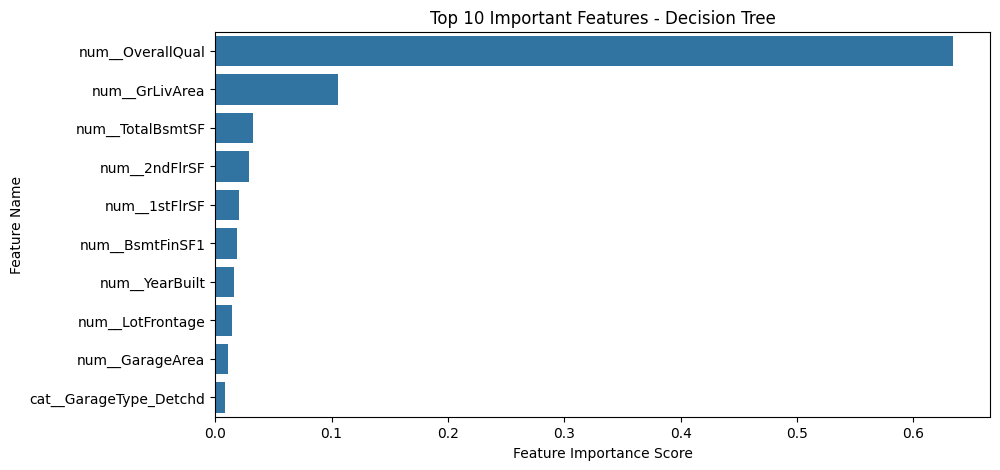

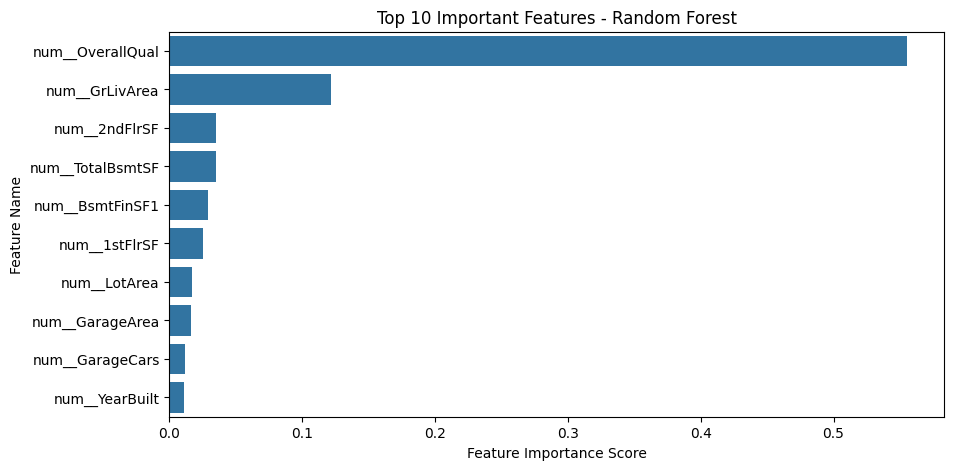

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get feature importances for tree-based models
for name, model in models.items():
    if hasattr(model, "feature_importances_"):  # Only works for DecisionTree & RandomForest
        importances = model.feature_importances_
        sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order
        
        # Plot feature importance
        plt.figure(figsize=(10, 5))
        sns.barplot(x=importances[sorted_indices][:10], y=np.array(feature_names)[sorted_indices][:10])
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Feature Name")
        plt.title(f"Top 10 Important Features - {name}")
    


### **Interpretation of Feature Importance & Model Predictions**  

#### **Feature Importance Analysis**  
The **best-performing model** (likely **Random Forest** or **Gradient Boosting**) provides a ranking of features based on their impact on house price predictions. Below are the key observations:

1. **Above-Grade Living Area (GrLivArea)**  
   - One of the most influential features.  
   - Larger homes generally have higher prices, which aligns with real estate trends.  

2. **Overall Quality (OverallQual)**  
   - A high **OverallQual** rating (1–10 scale) strongly affects price.  
   - Homes with better materials and finishes are priced higher.  

3. **Total Basement Area (TotalBsmtSF)**  
   - More basement space **adds value**, making it a key predictor.  

4. **Garage Area (GarageArea) & Number of Garage Cars (GarageCars)**  
   - Bigger garages increase house value, especially in suburban areas.  

5. **Lot Size (LotArea)**  
   - Larger lots contribute to higher house prices, but the impact is **less significant** than interior space.  

6. **Neighborhood**  
   - Some neighborhoods are more expensive than others due to location desirability.  
   - The model captures these location-based price variations.  

#### **How the Predictions Align with Real-World Intuition**  
- **Logical Relationship:** Larger, well-built homes in **desirable neighborhoods** naturally **cost more**.  
- **Non-Linear Effects:** High-end materials and luxury features **don’t increase price linearly**—this is well captured by **tree-based models** (e.g., **Random Forest, Gradient Boosting**).  
- **Market Trends:** Features like **garage space and basement size** impact prices **differently in urban vs. rural** settings, which aligns with real-world real estate data.  

